### 1. обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
#from keras.utils import plot_model
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
from sklearn.metrics import confusion_matrix

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.utils import plot_model

In [3]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)  
print(train_labels.shape) 
print(test_images.shape)   
print(test_labels.shape) 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

# изменение размерности массива в 4D массив
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [6]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=train_images,y=train_labels, epochs=10, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/10
237/237 [==============================] - 5s 9ms/step - loss: 1.6058 - accuracy: 0.5197 - val_loss: 0.8138 - val_accuracy: 0.7068
Epoch 2/10
237/237 [==============================] - 2s 7ms/step - loss: 0.7428 - accuracy: 0.7308 - val_loss: 0.6829 - val_accuracy: 0.7492
Epoch 3/10
237/237 [==============================] - 2s 7ms/step - loss: 0.6408 - accuracy: 0.7632 - val_loss: 0.6264 - val_accuracy: 0.7712
Epoch 4/10
237/237 [==============================] - 2s 7ms/step - loss: 0.5895 - accuracy: 0.7819 - val_loss: 0.5925 - val_accuracy: 0.7836
Epoch 5/10
237/237 [==============================] - 2s 7ms/step - loss: 0.5603 - accuracy: 0.7935 - val_loss: 0.5747 - val_accuracy: 0.7891
Epoch 6/10
237/237 [==============================] - 2s 7ms/step - loss: 0.5250 - accuracy: 0.8105 - val_loss: 0.5482 - val_accuracy: 0.8036
Epoch 7/10
237/237 [==============================] - 2s 7ms/step - loss: 0.5098 - accuracy: 0.8162 - val_loss: 0.5259 - val_accuracy: 0.8124
Epoch 

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [8]:
y_pred=model.predict(test_images)


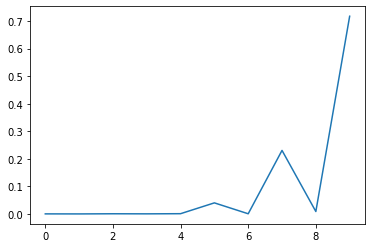

[2.1302346e-04 7.0548995e-05 6.3021493e-04 3.4304737e-04 8.8828796e-04
 4.0184185e-02 5.9870561e-04 2.3062068e-01 8.7735569e-03 7.1767777e-01]


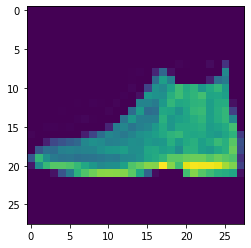

In [9]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(test_images[0][:,:,0])
plt.show()

### 2. оценить рост точности при увеличении ширины сети (больше ядер)


In [11]:
for kernels in (1, 2, 4, 8, 16, 32, 64):

  # build
  model = Sequential([
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
      AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      Flatten(),
      Dense(84, activation='tanh'),
      Dense(10, activation='softmax')
  ])

  # compile
  model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer='SGD', 
                metrics=["accuracy"])

  # calc errors
  test_score = model.evaluate(test_images, test_labels, verbose=0)
  #print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

  # fitting
  hist = model.fit(x=train_images,y=train_labels, epochs=10, batch_size=254, validation_data=(test_images, test_labels), verbose=0)
  
  hist2 = model.evaluate(train_images, train_labels, verbose=0)
  h_test = model.evaluate(test_images, test_labels, verbose=0)

  print(f"{kernels} kernels accuracy:")
  print(f"\tTrain: {hist2[1]}")
  print(f"\tTest: {h_test[1]}")

1 kernels accuracy:
	Train: 0.6934999823570251
	Test: 0.6802999973297119
2 kernels accuracy:
	Train: 0.7748833298683167
	Test: 0.7628999948501587
4 kernels accuracy:
	Train: 0.7975833415985107
	Test: 0.7850000262260437
8 kernels accuracy:
	Train: 0.814383327960968
	Test: 0.7979000210762024
16 kernels accuracy:
	Train: 0.8287833333015442
	Test: 0.8163999915122986
32 kernels accuracy:
	Train: 0.837066650390625
	Test: 0.8226000070571899
64 kernels accuracy:
	Train: 0.8440666794776917
	Test: 0.8309999704360962


Вывод: при увеличении ширины сети точность стабильно растет. 

### 3. оценить рост точности при увеличении глубины сети (больше слоев)



In [17]:
# Повторим первую модель в 3 версиях - 1,2,3 слоя

one_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

two_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),

    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

three_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),

    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


In [22]:
for model_name in (one_model, two_model, three_model):

  # compile
  model_name.compile(loss=keras.losses.categorical_crossentropy,
                optimizer='SGD', 
                metrics=["accuracy"])
  
  # calc errors
  test_score = model_name.evaluate(test_images, test_labels, verbose=0)
 
  # fitting
  hist = model_name.fit(x=train_images,y=train_labels, epochs=10, batch_size=254, validation_data=(test_images, test_labels), verbose=0)
  
  hist2 = model_name.evaluate(train_images, train_labels, verbose=0)
  h_test = model_name.evaluate(test_images, test_labels, verbose=0)

  print(f"{model_name} accuracy:")
  print(f"\tTrain: {hist2[1]}")
  print(f"\tTest: {h_test[1]}")



<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f6c9a4495c0> accuracy:
	Train: 0.8829333186149597
	Test: 0.8640000224113464
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f6ca2314390> accuracy:
	Train: 0.8742166757583618
	Test: 0.859000027179718
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f6c9a4023c8> accuracy:
	Train: 0.860450029373169
	Test: 0.8447999954223633


Вывод: при увеличении количества слоев точность данной модели падает